In [1]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
K_CLUSTERS = 24  # The desired number of colors (compression level)
IMAGE_PATH = 'C:/Users/User/Downloads/beautiful.jpg'

try:
    # Load image
    img = Image.open(IMAGE_PATH)
    
    # Convert to NumPy array
    img_array = np.array(img)
    
    print(f"Original image shape: {img_array.shape}")
    print(f"Original unique colors (approx): {len(np.unique(img_array.reshape(-1, 3), axis=0))}")
    
except FileNotFoundError:
    print(f"Error: Image file not found at '{IMAGE_PATH}'. Please ensure the file exists.")

Original image shape: (4320, 7680, 3)
Original unique colors (approx): 312983


In [6]:
if 'img_array' in locals():
    
    width, height, depth = img_array.shape
    
    # Reshape the 3D image array into a 2D
    pixel_data = img_array.reshape(width * height, depth)
    
    print(f"Reshaped pixel data shape (N_pixels x N_channels): {pixel_data.shape}")
    print("Data is ready for K-means clustering.")

Reshaped pixel data shape (N_pixels x N_channels): (33177600, 3)
Data is ready for K-means clustering.


In [7]:
if 'pixel_data' in locals():
    
    print(f"Starting K-means with K = {K_CLUSTERS}...")

    kmeans = KMeans(n_clusters=K_CLUSTERS, random_state=42, n_init='auto')
    
    #Fit the model to the pixel data
    kmeans.fit(pixel_data)

    labels = kmeans.predict(pixel_data)
    
    centroids = kmeans.cluster_centers_
    centroids = np.uint8(centroids) 
    
    print("K-means clustering complete.")
    print(f"Centroid colors found (K x 3): {centroids.shape}")

Starting K-means with K = 24...
K-means clustering complete.
Centroid colors found (K x 3): (24, 3)


Compressed image shape: (4320, 7680, 3)
Compressed unique colors: 24


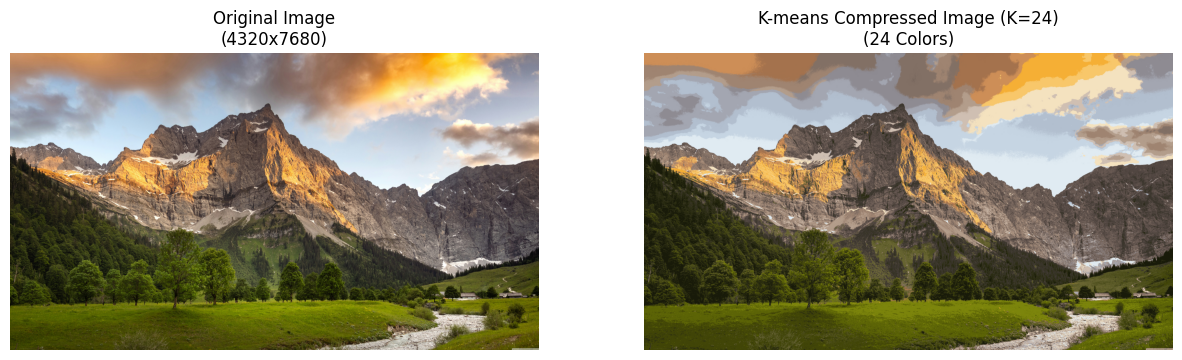

In [8]:
if 'labels' in locals():
    
    compressed_data = centroids[labels]
    
    #Reshape the data back into the original image dimensions
    compressed_img_array = compressed_data.reshape(width, height, depth)
    
    #Create the final compressed PIL Image object
    compressed_img = Image.fromarray(compressed_img_array)
    
    print(f"Compressed image shape: {compressed_img_array.shape}")
    print(f"Compressed unique colors: {len(centroids)}")
    
    # display
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    #Original Image
    axes[0].imshow(img)
    axes[0].set_title(f'Original Image\n({width}x{height})')
    axes[0].axis('off')
    
    #Compressed Image
    axes[1].imshow(compressed_img)
    axes[1].set_title(f'K-means Compressed Image (K={K_CLUSTERS})\n({K_CLUSTERS} Colors)')
    axes[1].axis('off')
    
    plt.show()

In [ ]:
if 'compressed_img' in locals():
    
    output_filename = f'new compressed k{K_CLUSTERS} image.jpg'
    
    try:
        compressed_img.save(output_filename)
        print(f"✅ Photo successfully saved as: {output_filename}")
        
    except Exception as e:
        print(f"❌ Error saving image: {e}")
        
else:
    print("Cannot save image. The 'compressed_img' object was not found. Please run Cells 1-4 first.")

✅ Photo successfully saved as: new compressed k2 image.jpg
